# **IMPORTS/COMFIGIRAÇÕES**

In [1]:
# Bibliotecas de manipulação
import numpy as np  # Manipulação de matrizes
import pandas as pd  # Manipulação de dados tabulares
# Bibliotecas de visualização gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Bibliotecas próprias
from PROJECT_LIBRARY.Data_extraction import *  # Biblioteca própria para extração dos dados
from PROJECT_LIBRARY.Data_transformation import *  # Biblioteca própria para transformação dos dados
# Biblioteca de filtro de notificações
import warnings



warnings.filterwarnings(action='ignore')
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None
pd.options.display.float_format = lambda x: f'{x:,.2f}'

In [2]:
upgrade_data(fold='./RAW_DATAS')

# **ANÁLISE DESCRITIVA**

In [3]:
df = pd.read_parquet('./DATASETS/finally_data.parquet')
df.head(5)

,COMPETÊNCIA,ESFERA,UF,AJUSTES,EC123,COUN,VAAF,VAAR,VAAT,FPE,FPM,ICMS,IPI,IPVA,ITCMD,ITR,LC8796,Ajuste,TOTAL
0,2007-01-01,ESTADUAL,AC,False,0.00,0.00,0.00,0.00,0.00,"9,679,990.36","1,582,026.94","3,147,424.17","3,548.46",0.00,0.00,0.00,0.00,0.00,"14,412,989.93"
1,2007-01-01,ESTADUAL,AC,True,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2007-01-01,ESTADUAL,AL,False,0.00,0.00,0.00,0.00,0.00,"4,649,019.37","2,800,656.42","2,781,356.76","25,488.94",0.00,0.00,0.00,0.00,0.00,"10,256,521.49"
3,2007-01-01,ESTADUAL,AL,True,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2007-01-01,ESTADUAL,AM,False,0.00,0.00,0.00,0.00,0.00,"5,436,974.54","2,819,795.95","19,285,518.14","401,249.83",0.00,0.00,0.00,0.00,0.00,"27,943,538.46"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23328 entries, 0 to 23327
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   COMPETÊNCIA  23328 non-null  datetime64[ns]
 1   ESFERA       23328 non-null  object        
 2   UF           23328 non-null  object        
 3   AJUSTES      23328 non-null  bool          
 4   EC123        23328 non-null  float64       
 5   COUN         23328 non-null  float64       
 6   VAAF         23328 non-null  float64       
 7   VAAR         23328 non-null  float64       
 8   VAAT         23328 non-null  float64       
 9   FPE          23328 non-null  float64       
 10  FPM          23328 non-null  float64       
 11  ICMS         23328 non-null  float64       
 12  IPI          23328 non-null  float64       
 13  IPVA         23328 non-null  float64       
 14  ITCMD        23328 non-null  float64       
 15  ITR          23328 non-null  float64       
 16  LC87

In [5]:
df.memory_usage()

Index             132
COMPETÊNCIA    186624
ESFERA         186624
UF             186624
AJUSTES         23328
EC123          186624
COUN           186624
VAAF           186624
VAAR           186624
VAAT           186624
FPE            186624
FPM            186624
ICMS           186624
IPI            186624
IPVA           186624
ITCMD          186624
ITR            186624
LC8796         186624
Ajuste         186624
TOTAL          186624
dtype: int64

## VARIÁVEIS NUMÉRICAS

In [6]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_columns

['EC123',
 'COUN',
 'VAAF',
 'VAAR',
 'VAAT',
 'FPE',
 'FPM',
 'ICMS',
 'IPI',
 'IPVA',
 'ITCMD',
 'ITR',
 'LC8796',
 'Ajuste',
 'TOTAL']

### Tratamentos

In [7]:
df.describe()

,COMPETÊNCIA,EC123,COUN,VAAF,VAAR,VAAT,FPE,FPM,ICMS,IPI,IPVA,ITCMD,ITR,LC8796,Ajuste,TOTAL
count,23328,"23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00","23,328.00"
mean,2015-12-16 10:53:20,"31,016.32","6,001,053.60","3,266,391.37","81,406.09","1,327,423.78","12,146,402.49","12,712,030.13","60,493,523.12","689,356.84","5,620,068.28","965,207.82","159,377.03","196,086.33","8,558.91","103,697,902.16"
min,2007-01-01 00:00:00,0.00,"-213,329,018.65","-177,096,290.90",0.00,"-4,017,062.82","-13,294,613.27","-13,760,903.53","-33,113,879.07","-941,954.25","-11,514,016.68","-692,836.03","-10,531.09",0.00,0.00,"-213,329,016.65"
25%,2011-06-23 12:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2015-12-16 12:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2020-06-08 12:00:00,0.00,0.00,0.00,0.00,0.00,"17,842,769.34","14,268,187.63","49,019,153.71","242,308.96","2,263,079.41","200,159.91","13,204.30","33,913.98",0.00,"107,759,618.44"
max,2024-12-01 00:00:00,"121,893,595.92","777,405,463.20","891,910,015.10","41,131,672.03","590,990,738.15","250,779,967.56","283,833,187.85","2,431,147,109.50","19,202,111.15","1,177,690,607.31","89,383,539.05","31,457,569.15","29,611,036.12","54,682,223.94","3,676,716,953.17"
std,NaN,"1,246,477.76","29,681,929.72","27,838,746.60","852,352.81","13,967,617.85","20,783,454.07","25,786,745.32","169,252,987.60","1,778,401.11","30,591,818.93","3,856,000.92","1,116,402.39","777,197.01","507,036.42","236,910,468.87"


In [ ]:
# Tratamento de constantes 
cons = df.nunique()
cons.loc[cons.values==1].index.to_list()
# - (Não foram identificadas constantes entre os dados)

# Tratamento de duplicados
df.loc[df.duplicated()]
# - (Não foram identificadas registros duplicados entre os dados)

# Tratamento de valores ausentes
df.loc[df.isnull().any(axis=1)]
# - (Não foram identificadas registros ausentes entre os dados)

# Tratamento de valores inconsistentes ou sujos
# - Foram identificados valores negativos que representam ajustes e não se tratam de irregulares 
# df.loc[(df['TOTAL LIQUIDO'] < 0) & (df['CATEGORIA']!='Outros')]
# df.loc[(df['ESFERA']=='Estadual') & (df['UF']=='PB') & (df['COMPETÊNCIA']>='2023-01-01') & (df['COMPETÊNCIA']<='2023-12-31')]['TOTAL AJUSTE'].sum()
# - Não se sabe o motivo desses ajustes, entretanto, para os montantes corretos de 'total de ajuste' e 'total liquido', estes devem ser considerados negativos

Observa-se que os dados estão inicialmente tratados, conforme exposto na análise exploratória, e se encontram agrupados pela sua fonte de recurso, período, esfera e uf.

### Distribuição

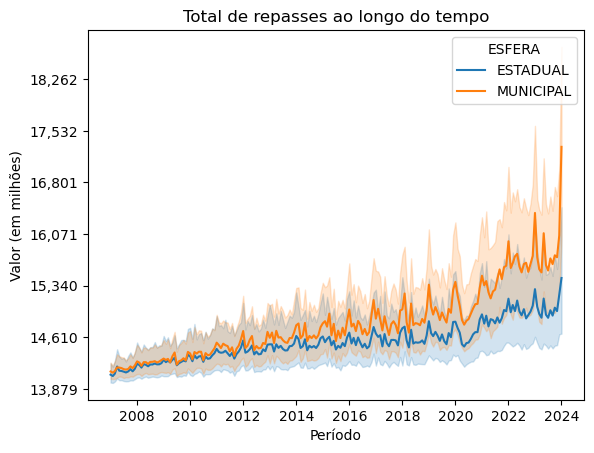

In [19]:
# Filtro
data = df[(df['COMPETÊNCIA']<='2024-01-01')]

# Criação do gráfico
sns.lineplot(
    data=data,
    y='TOTAL',
    x='COMPETÊNCIA',
    hue='ESFERA'
)

# Ajustando título e rótulos dos eixos
plt.title('Total de repasses ao longo do tempo')
plt.ylabel('Valor (em milhões)')
plt.xlabel('Período')

# Formantando valor do eixo y
plt.gca().set_yticklabels([f'{x:,.0f}' for x in plt.gca().get_xticks()])  # Formato para o eixo x

plt.show()

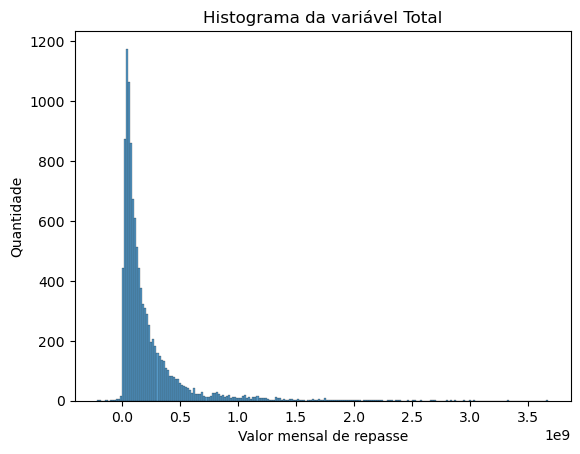

In [24]:
# Filtro
data = df.loc[df.TOTAL!=0]

# Gráfico
sns.histplot(
    data=data,
    x='TOTAL'
    )

# Configurações do gráfico
plt.title('Histograma da variável Total')
plt.ylabel('Quantidade')
plt.xlabel('Valor mensal de repasse')
# Plot
plt.show()

Visualmente podemos notar 

<Axes: xlabel='TOTAL'>

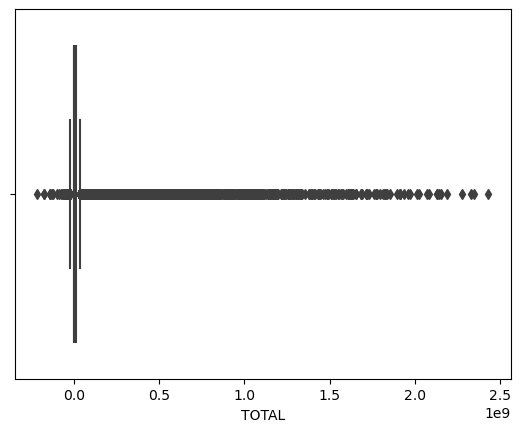

In [26]:
sns.boxplot(
    data=df[df['COMPETÊNCIA']<='2024-01-01'],
    x='TOTAL'
)

## VARIÁVEIS CATEGÓRICAS

In [ ]:
cat_vars = df.select_dtypes(include=['category']).columns.to_list()
cat_vars

In [ ]:
df.describe(include='category')

In [ ]:
for cat in cat_vars:
    print(cat, sorted(df[cat].unique().to_list()))

x - Distribuição dos valores mensais (boxplot)

In [ ]:
df_temp = df_e.copy()
df_temp = df_temp.resample('m').sum()

fig = px.box(data_frame=df_temp, x=['TOTAL LIQUIDO'], points='all', hover_name=df_temp.index)
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='y', xaxis_tickformat=',.2f')
fig.show()

x - Valor total dos repasses por ano

In [ ]:
df_temp = df_e.copy()
df_temp = df_temp.resample(rule='y').sum(numeric_only=True)

fig = px.line(data_frame=df_temp,  y='TOTAL LIQUIDO', x=df_temp.index.year, title='Total de repasses efetuados aos estados por ano de 2007 a 09-2023', markers='.')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2s')
fig.show()

x - Valor total dos repasses por mês (tendência, velocidade e aceleração)

In [ ]:
df_temp = df_e.copy()
filtro = df_temp.UF == 'AP'
df_temp = df_temp[filtro].resample(rule='M').sum(numeric_only=True)
df_temp['MEDIA MOVEL'] = df_temp['TOTAL LIQUIDO'].rolling(window=12).mean()

fig = px.line(data_frame=df_temp,  y=['TOTAL LIQUIDO', 'MEDIA MOVEL'], x=df_temp.index, title='Total de repasses efetuados aos estados por mês de 01-2007 a 09-2023')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
fig.show()

x - Estacionariedade e ruido

In [ ]:
df_temp = df_e.copy()
df_temp = df_temp.resample(rule='m').sum(numeric_only=True)
df_temp['DIFERENCIAÇÃO'] = df_temp['TOTAL LIQUIDO'].diff(1)

fig = px.bar(data_frame=df_temp, x=df_temp.index, y=['DIFERENCIAÇÃO'])
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
fig.show()

x - Sazonalidade

In [ ]:
df_temp = df_e.copy()
df_temp = df_temp.resample(rule='m').sum(numeric_only=True)
df_temp['MEDIA MOVEL'] = df_temp['TOTAL LIQUIDO'].rolling(window=7).mean()
df_temp['SAZONALIDADE'] = df_temp['TOTAL LIQUIDO'].diff(1)
df_temp = df_temp['SAZONALIDADE'].groupby(df_temp.index.month).mean()

fig = px.bar(data_frame=df_temp, x=df_temp.index, y=['SAZONALIDADE'])
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
fig.show()

x - Média anual dos repasses por estados

In [ ]:
df_temp = df_e.copy()
df_temp = df_temp.groupby('UF').resample(rule='Y').sum(numeric_only=True).reset_index(level=0)
df_temp = df_temp.groupby('UF').mean().sort_values(by='TOTAL LIQUIDO')

fig = px.bar(data_frame=df_temp,  x='TOTAL LIQUIDO', y=df_temp.index, title='Média do total de repasses recebidos por ano para cada estado de 2007 a 10-2023')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='y unified', xaxis_tickformat=',.2f')
fig.show()

x - Média anual dos repasses por fonte

In [ ]:
df_temp = df_e.copy()
df_temp = df_temp.groupby('REPASSE').resample(rule='Y').sum(numeric_only=True).reset_index(level=0)
df_temp = df_temp.groupby('REPASSE').mean().sort_values(by='TOTAL LIQUIDO')


fig = px.pie(data_frame=df_temp,  names=df_temp.index, values='TOTAL LIQUIDO', opacity=0.8, hole=0.5, title='Média do total de repasses recebidos por ano para cada fonte de 2007 a 09-2023')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='y unified', xaxis_tickformat=',.2f')
fig.show()

## QUADRO DO PERÍODO ATUAL


x - Total de repasses por mês de 2023

In [ ]:
df_temp = df_e.copy()
filter = (df_temp.index.year >= 2023) & (df_temp.index.month <= 10)
df_temp = df_temp[filter].resample(rule='MS').sum(numeric_only=True)
display(df_temp.head())

fig = px.line(data_frame=df_temp, x=df_temp.index, y='TOTAL LIQUIDO')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='y unified', yaxis_tickformat=',.2f')
fig.show()

In [ ]:
df_temp = df_e.copy()
filter = (df_temp.UF == 'AP') & (df_temp.index.year >= 2023) & (df_temp.index.month <= 10)
df_temp = df_temp[filter].resample(rule='MS').sum(numeric_only=True)
df_temp['SOMA CUMULATIVA'] = df_temp['TOTAL LIQUIDO'].cumsum()
df_temp.head()

fig = px.bar(data_frame=df_temp,  y=['SOMA CUMULATIVA'], x=df_temp.index, title='Total de repasses efetuados aos estados por mês de 01-2007 a 10-2023')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
fig.show()

x - Ranking dos estados com maior valor total de repasses no período

In [ ]:
df_temp = df.copy().set_index(keys='COMPETÊNCIA')
df_temp = df_temp.loc[(df_temp.index.year >= 2023) & (df_temp.index.month <= 10)]
df_temp = df_temp[df_temp.ESFERA =='Estadual']
df_temp = df_temp.groupby('UF').resample(rule='Y').sum(numeric_only=True).reset_index(level=0).sort_values(by='TOTAL LIQUIDO')
display(df_temp.head())

fig = px.bar(data_frame=df_temp, y='UF', x='TOTAL LIQUIDO')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
fig.show()

x - Ranking do valor total de repasses por fonte

In [ ]:
df_temp = df_e.copy()
filter = (df_temp.index.year == 2023) & (df_temp.index.month <= 10)
df_temp = df_temp[filter].groupby('REPASSE').sum(numeric_only=True).loc[['COUN_VAAF', 'COUN_VAAR', 'COUN_VAAT', 'FPE', 'FPM', 'ICMS', 'IPI', 'IPVA', 'ITCMD', 'ITR'], :].sort_values(by='TOTAL LIQUIDO', ascending=False)

fig = px.bar(data_frame=df_temp, x=df_temp.index.get_level_values(0), y='TOTAL LIQUIDO')
fig.update_traces(hovertemplate=None)
fig.update_layout(hovermode='x unified', yaxis_tickformat=',.2f')
fig.show()